In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import and Clean data
The data from [Feeding America](https://www.feedingamerica.org/) is living in CSV files in the `/data` directory. The code block below imports that data, cleans it for our use, and combines it into the `allData.csv` file.

In [55]:
# Import data from CSV files, add year as column

importDirect = True
if 'google.colab' in str(get_ipython()):
    importDirect = False

if importDirect:
    data_frames = {}
    for year in range(2010, 2018):
        data_frames[year] = pd.read_csv('data/{}Data.csv'.format(year))
        data_frames[year]['Year'] = year

    data_frames[2018] = pd.read_csv('data/2018Data.csv',header=1)
    data_frames[2018]['Year'] = 2018


    # Create list of preferred column names
    col_names = ['FIPS', 'State', 'Food Insecurity Rate', '# Food Insecure Persons', 'Low Threshold in state', 'Low Threshold Type', 'High Threshold in state', 'High Threshold Type', '% FI <= Low Threshold', '% FI Btwn Thresholds', '$ FI > High Threshold', 'Child food insecurity rate', '# Food Insecure Children', '% food insecure children in HH w/ HH incomes below 185 FPL', '% food insecure children in HH w/ HH incomes above 185 FPL', 'Cost Per Meal', 'Weighted Annual Food Budget Shortfall', 'Year', 'County']

    # Clean data
    for key in data_frames:
        df = data_frames[key]
        df[['County', 'Long State']] = df['County, State'].str.split(',',expand=True)
        df = df.drop(['County, State', 'Long State'],axis=1)
        df.columns = col_names # rename columns
        data_frames[key] = df

    # Concatenate all datarames into one
    frames = [data_frames[key] for key in data_frames]

    df = pd.concat(frames)
    df.to_csv('allData.csv') # export into CSV file
    projections2020 = pd.read_csv('data/2020Projections.csv')
else:
    url = 'https://raw.githubusercontent.com/wesmith4/mat210-data-viz/master/feedingAmerica/allData.csv'
    df = pd.read_csv(url, index_col = 0)
    projections2020 = pd.read_csv('https://raw.githubusercontent.com/wesmith4/mat210-data-viz/master/feedingAmerica/data/2020Projections.csv')

In [56]:
forReplacement = ['Food Insecurity Rate', 'Child food insecurity rate', 'Low Threshold in state', 'High Threshold in state', '% food insecure children in HH w/ HH incomes below 185 FPL', '% food insecure children in HH w/ HH incomes above 185 FPL']
for field in forReplacement:
    df[field] = df[field].str.replace('%', '').replace('-*', 'NaN')

df = df.astype({'Food Insecurity Rate': float, 'Child food insecurity rate': float})

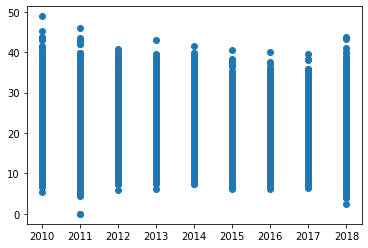

In [57]:
fig, ax = plt.subplots()
ax.scatter(df.Year,df['Child food insecurity rate'])
plt.show()

In [53]:
df.groupby(['Year', 'State', 'County'])['Child food insecurity rate'].mean()

Year  State  County                    
2010  AK     Aleutians East Borough        21.4
             Aleutians West Census Area    15.3
             Anchorage Municipality        17.0
             Bethel Census Area            28.2
             Bristol Bay Borough           13.0
                                           ... 
2018  WY     Sweetwater County             15.4
             Teton County                   8.4
             Uinta County                  18.7
             Washakie County               18.4
             Weston County                 22.3
Name: Child food insecurity rate, Length: 28282, dtype: float64

In [54]:
df[df['County'] == "New Hanover County"].groupby('Year')['Child food insecurity rate'].mean()

Year
2010    23.7
2011    24.4
2012    24.7
2013    24.6
2014    23.6
2015    22.1
2016    20.3
2017    20.1
2018    18.7
Name: Child food insecurity rate, dtype: float64

In [58]:
get_ipython()